# Udacity DataAnalyst Nanodegree

## Project: Investigate a dataset
### Dataset chosen: Kaggle Titanic

##### The Kaggle Titanic dataset is used as an example dataset for introducing the user to data analysis and machine learning. In this project no machine learning is required. Therefore I will concentrate on the analysis of the data only and specifically on those aspects related to the survival probability of passengers.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option("display.max_rows", 6)

##### First we read in the dataset. Kaggel differentiate the dataset into training set and test set for its challenge purposes. The test set does not contain information on the destiny of the passengers. Therefore for the analysis I concentrate only on the training set.

In [8]:
path = "data/train.csv"
data = pd.read_csv(path)
print ("Number of passengers:" , len(data))

Number of passengers: 891


##### Here it follows the header of the dataset showing all the features contained in the dataset (below for a description)

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### PassengerId: (integer)
Identification number for each passenger in the dataset.

##### Survived: (boolean)
It can take values 0 (1) when a passenger dies (survives).

##### Pclass: (integer)
It can take values 1, 2, 3, indicating high, middle or low class.

##### Name: (string)
The name of the passenger. It may contain also status indicators (Mr. , Mrs., Dr. ...)

##### Sex: (string)
Either "male" or "female".

##### Age: (float)
The age can be an integer or a float in the case when it is estimated.

##### SibSp: (integer)
Number of siblings and spouses on board.

##### Parch: (integer)
Number of parents and children on board.

##### Ticket : (serial number)
Ticket number.

##### Fare: (float)
Price of the ticket.

##### Cabin: (serial number)
Cabin rented (if any).

##### Embarked: (char)
Place of embarkment, either "S" (Southampton), "C" (Cherbourg) or "Q" (Queenstown). Some NaN values present.

### NaN values
##### For consistency I evaluat how many NaN data are present for each feature. We can see that the information on the Cabin is missing in about 77% of the instances. This variable informative content should then be low in respect to others. For the analysis of the dataset here, I will drop this variable. Similarly the age variable is also missing in most of the cases. Does it make sense to drop it for survival reasoning? There are three ways we can follow: 1) drop the column, 2) Eliminate all the instances which have NaN age, 3) Substitute the NaN values with some estimated value. The first choice is not employed here since I believe that age information is crucial for predicting survival probability. The second choice leads to a reduction of the dataset of about 20%. This could be a way to follow but if we could use choice 3 in a smart way, we could be able to avoid dataset reduction.

In [10]:
for k in data.keys():
    print (k, data[k].isnull().sum())

PassengerId 0
Survived 0
Pclass 0
Name 0
Sex 0
Age 177
SibSp 0
Parch 0
Ticket 0
Fare 0
Cabin 687
Embarked 2


#### The following line drops some variables which are not used in the following analysis

In [15]:
data.drop(["PassengerId", "Cabin"],1,inplace=True)
data.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


## Variable distributions

##### In this section I consider each remaining variable alone and study the value distribution. The name and Ticket variables are for now put on the side. Moreover since the aim of the anaysis is to investigate the role of the features on the survival of the passengers, I will show the distribution for the subsets of survived and non-survived passengers.

### Age distribution

##### From the distributions we can extract some hints:
    - Old people (above 65 years old) have very low chances of survival
    - Infants and very small children have higher chances of survival

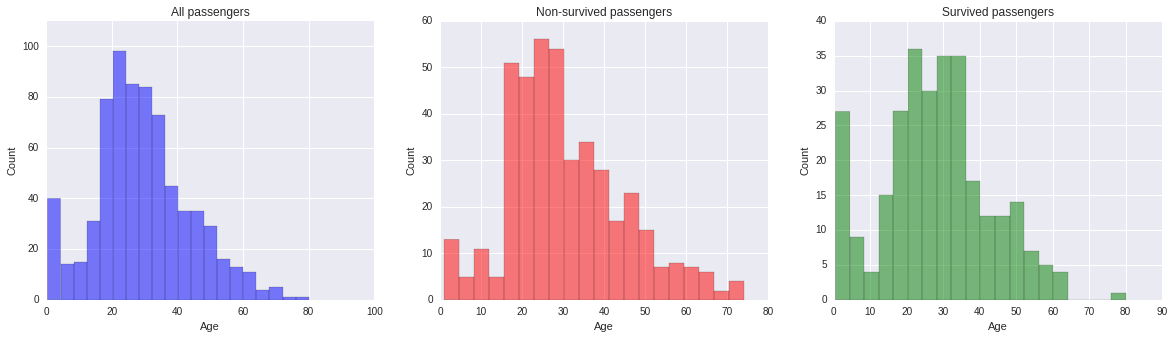

In [24]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
n, bins, patches = plt.hist(data['Age'].dropna(), 20, facecolor='blue', alpha=0.5)
plt.title("All passengers")
plt.xlabel('Age')
plt.ylabel('Count')
plt.axis([0, 100, 0, 110])
plt.grid(True)

plt.subplot(1,3,2)
n, bins, patches = plt.hist(data['Age'].dropna()[data['Survived']== 0], 20, facecolor='red', alpha=0.5)
plt.title("Non-survived passengers")
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)

plt.subplot(1,3,3)
plt.title("Survived passengers")
n, bins, patches = plt.hist(data['Age'].dropna()[data['Survived']== 1], 20, facecolor='green', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)

### Gender distribution

##### This distrbution shows with clear result that most of the casualties are men, and that women have much higher chances of survival. Moreover we can see that the number of men in the dataset is almost double that that of women.

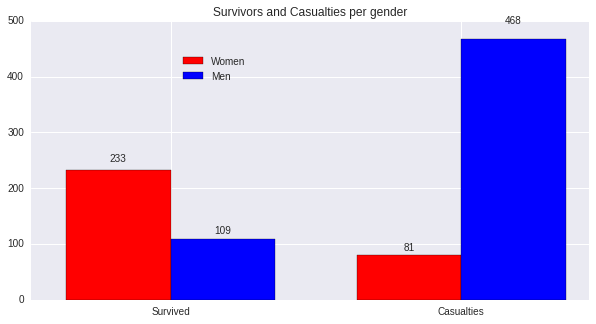

In [59]:
women_sur = data[(data['Sex'] == 'female') & (data["Survived"]==1)]
women_dead = data[(data['Sex'] == 'female') & (data["Survived"]==0)]
men_sur = data[(data['Sex'] == 'male') & (data["Survived"]==1)]
men_dead = data[(data['Sex'] == 'male') & (data["Survived"]==0)]

plt.figure(figsize=(10,10))
fig, ax = plt.subplots(figsize=(10,5))
width = 0.3
ind = np.arange(2)/1.2 + 0.1

rects1 = ax.bar(ind, (len(women_sur), len(women_dead)), width, color='red')
rects2 = ax.bar(ind+width, (len(men_sur), len(men_dead)), width, color='blue')

ax.set_title('Survivors and Casualties per gender')
ax.set_xticks(ind + width)
ax.set_xticklabels(('Survived', 'Casualties'))
ax.legend((rects1[0], rects2[0]), ('Women', 'Men'), bbox_to_anchor=(0.05, 0.8, 0.35, .105))
plt.grid(True)
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height, '%d' % int(height), ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

### Passenger Class

##### We proceed to see the distribution for passenger class, showing that passenger of third class have a much lower survival chance.

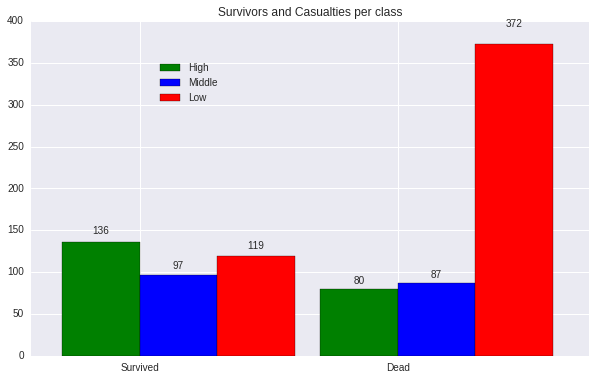

In [67]:
high_class_sur = len(data[(data['Pclass']== 1) & (data["Survived"]==1)])
middle_class_sur = len(data[(data['Pclass']== 2)& (data["Survived"]==0)])
low_class_sur = len(data[(data['Pclass']== 3)& (data["Survived"]==1)])
high_class_dead = len(data[(data['Pclass']== 1)& (data["Survived"]==0)])
middle_class_dead = len(data[(data['Pclass']== 2)& (data["Survived"]==1)])
low_class_dead = len(data[(data['Pclass']== 3) & (data["Survived"]==0)])

fig2, ax = plt.subplots(figsize=(10,6))

width = 0.25
ind = np.arange(2)/1.2 + 0.1

high =(high_class_sur, high_class_dead)
rects1 = ax.bar(ind, high, width, color='green')

middle = (middle_class_sur, middle_class_dead)
rects2 = ax.bar(ind+width, middle, width, color='blue')

low = (low_class_sur, low_class_dead)
rects3 = ax.bar(ind+2*width, low, width, color='red')

ax.set_title('Survivors and Casualties per class')
ax.set_xticks(ind + width)
ax.set_xticklabels(('Survived', 'Dead'))
ax.legend((rects1[0], rects2[0], rects3[0]), ('High', 'Middle', 'Low'), bbox_to_anchor=(0., 0.8, 0.35, .102))
plt.grid(True)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)


#### We look now at survived/dead passenger per Embarkment harbor

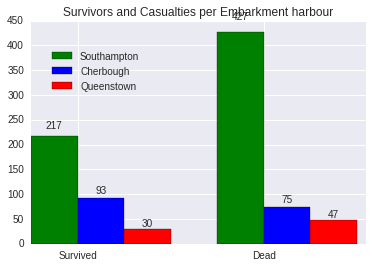

In [7]:
S_sur = len(data[data['Embarked'] == "S"][lambda data: data.Survived == 1])
S_dead = len(data[data['Embarked'] == "S"][lambda data: data.Survived == 0])
C_sur = len(data[data['Embarked'] == "C"][lambda data: data.Survived == 1])
C_dead = len(data[data['Embarked'] == "C"][lambda data: data.Survived == 0])
Q_sur = len(data[data['Embarked'] == "Q"][lambda data: data.Survived == 1])
Q_dead = len(data[data['Embarked'] == "Q"][lambda data: data.Survived == 0])
plt.figure(5)
fig3, ax = plt.subplots()

S =(S_sur, S_dead)
rects1 = ax.bar(ind, S, width, color='green')

C = (C_sur, C_dead)
rects2 = ax.bar(ind+width, C, width, color='blue')

Q = (Q_sur, Q_dead)
rects3 = ax.bar(ind+2*width, Q, width, color='red')

ax.set_title('Survivors and Casualties per Embarkment harbour')
ax.set_xticks(ind + width)
ax.set_xticklabels(('Survived', 'Dead'))
ax.legend((rects1[0], rects2[0], rects3[0]), ('Southampton', 'Cherbough', 'Queenstown'), bbox_to_anchor=(0., 0.8, 0.35, .102))
plt.grid(True)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

#### Conclusion: The most of the passenger have embarked in Southampton. The only interesting variable is that those coming from Cherbough seem to have higher probability of survival. We will check next the distribution of class for those passenger coming from Cherbough.

In [15]:
def plot_statistics(data, n_blocks, n_columns, n_figure, fixed_conditions, variable_conditions):
    for k in fixed_conditions:
        data = data[lambda data: data[k] == fixed_conditions[k]]
    
    for n in range (n_columns):
        for m in range (_blocks):
            pass
        pass
    

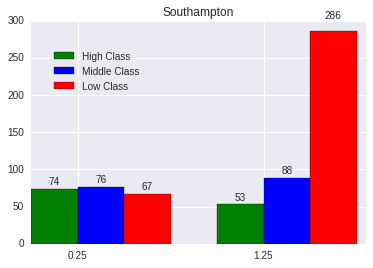

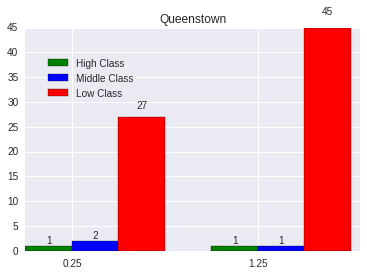

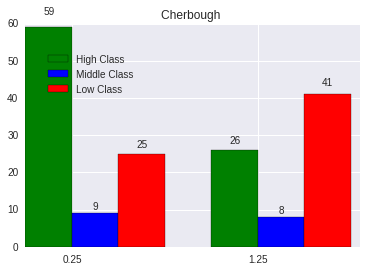

In [9]:


C_high_sur = len(data[data['Embarked'] == "C"][lambda data: data['Pclass'] == 1][lambda data: data.Survived == 1])
C_high_dead = len(data[data['Embarked'] == "C"][lambda data: data.Pclass == 1][lambda data: data.Survived == 0])
C_middle_sur = len(data[data['Embarked'] == "C"][lambda data: data.Pclass == 2][lambda data: data.Survived == 1])
C_middle_dead = len(data[data['Embarked'] == "C"][lambda data: data.Pclass == 2][lambda data: data.Survived == 0])
C_low_sur = len(data[data['Embarked'] == "C"][lambda data: data.Pclass == 3][lambda data: data.Survived == 1])
C_low_dead = len(data[data['Embarked'] == "C"][lambda data: data.Pclass == 3][lambda data: data.Survived == 0])

plt.figure(6)
fig4, ax = plt.subplots()

high =(C_high_sur, C_high_dead)
rects1 = ax.bar(np.arange(2), high, width, color='green')

middle = (C_middle_sur, C_middle_dead)
rects2 = ax.bar(np.arange(2)+width, middle, width, color='blue')

low = (C_low_sur, C_low_dead)
rects3 = ax.bar(np.arange(2)+2*width, low, width, color='red')

ax.set_title('Cherbough ')
ax.set_xticks(ind + width)
#ax.set_xticklabels(('Survived'))
ax.legend((rects1[0], rects2[0], rects3[0]), ('High Class', 'Middle Class', 'Low Class'), 
          bbox_to_anchor=(0., 0.8, 0.35, .102))
plt.grid(True)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)


S_high_sur = len(data[data['Embarked'] == "S"][lambda data: data.Pclass == 1][lambda data: data.Survived == 1])
S_high_dead = len(data[data['Embarked'] == "S"][lambda data: data.Pclass == 1][lambda data: data.Survived == 0])
S_middle_sur = len(data[data['Embarked'] == "S"][lambda data: data.Pclass == 2][lambda data: data.Survived == 1])
S_middle_dead = len(data[data['Embarked'] == "S"][lambda data: data.Pclass == 2][lambda data: data.Survived == 0])
S_low_sur = len(data[data['Embarked'] == "S"][lambda data: data.Pclass == 3][lambda data: data.Survived == 1])
S_low_dead = len(data[data['Embarked'] == "S"][lambda data: data.Pclass == 3][lambda data: data.Survived == 0])

plt.figure(7)
fig5, ax = plt.subplots()

high =(S_high_sur, S_high_dead)
rects1 = ax.bar(np.arange(2), high, width, color='green')

middle = (S_middle_sur, S_middle_dead)
rects2 = ax.bar(np.arange(2)+width, middle, width, color='blue')

low = (S_low_sur, S_low_dead)
rects3 = ax.bar(np.arange(2)+2*width, low, width, color='red')

ax.set_title('Southampton')
ax.set_xticks(ind + width)
ax.legend((rects1[0], rects2[0], rects3[0]), ('High Class', 'Middle Class', 'Low Class'), 
          bbox_to_anchor=(0., 0.8, 0.35, .102))
plt.grid(True)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)



Q_high_sur = len(data[data['Embarked'] == "Q"][lambda data: data.Pclass == 1][lambda data: data.Survived == 1])
Q_high_dead = len(data[data['Embarked'] == "Q"][lambda data: data.Pclass == 1][lambda data: data.Survived == 0])
Q_middle_sur = len(data[data['Embarked'] == "Q"][lambda data: data.Pclass == 2][lambda data: data.Survived == 1])
Q_middle_dead = len(data[data['Embarked'] == "Q"][lambda data: data.Pclass == 2][lambda data: data.Survived == 0])
Q_low_sur = len(data[data['Embarked'] == "Q"][lambda data: data.Pclass == 3][lambda data: data.Survived == 1])
Q_low_dead = len(data[data['Embarked'] == "Q"][lambda data: (data.Pclass == 3) & (data.Survived == 0) ])

plt.figure(8)
fig6, ax = plt.subplots()

high =(Q_high_sur, Q_high_dead)
rects1 = ax.bar(np.arange(2), high, width, color='green')

middle = (Q_middle_sur, Q_middle_dead)
rects2 = ax.bar(np.arange(2)+width, middle, width, color='blue')

low = (Q_low_sur, Q_low_dead)
rects3 = ax.bar(np.arange(2)+2*width, low, width, color='red')

ax.set_title('Queenstown')
ax.set_xticks(ind + width)
#ax.set_xticklabels(('Survived'))
ax.legend((rects1[0], rects2[0], rects3[0]), ('High Class', 'Middle Class', 'Low Class'), 
          bbox_to_anchor=(0., 0.8, 0.35, .102))
plt.grid(True)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

#### From Queenstown only third class passengers embarked. 

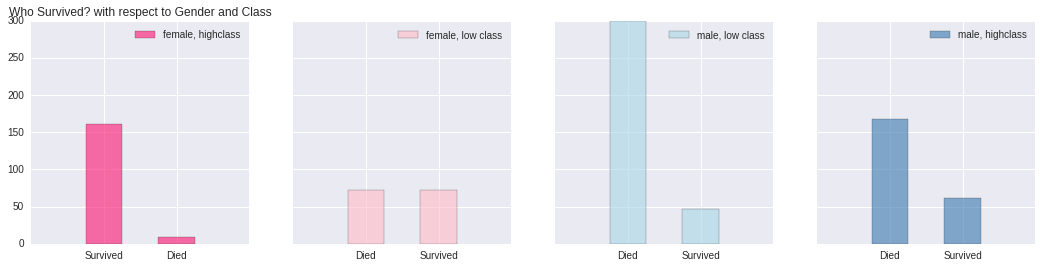

In [10]:
%matplotlib inline
df = data

fig = plt.figure(figsize=(18,4), dpi=1600)
alpha_level = 0.65

# building on the previous code, here we create an additional subset with in the gender subset 
# we created for the survived variable. I know, thats a lot of subsets. After we do that we call 
# value_counts() so it it can be easily plotted as a bar graph. this is repeated for each gender 
# class pair.
ax1=fig.add_subplot(141)
female_highclass = df.Survived[df.Sex == 'female'][df.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female, highclass', color='#FA2479', alpha=alpha_level)
ax1.set_xticklabels(["Survived", "Died"], rotation=0)
ax1.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
female_lowclass = df.Survived[df.Sex == 'female'][df.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=alpha_level)
ax2.set_xticklabels(["Died","Survived"], rotation=0)
ax2.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
male_lowclass = df.Survived[df.Sex == 'male'][df.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=alpha_level)
ax3.set_xticklabels(["Died","Survived"], rotation=0)
ax3.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
male_highclass = df.Survived[df.Sex == 'male'][df.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male, highclass', alpha=alpha_level, color='steelblue')
ax4.set_xticklabels(["Died","Survived"], rotation=0)
ax4.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')

We study now the age distribution per class and sex. This will be used to fill in the NaN values for Age feature

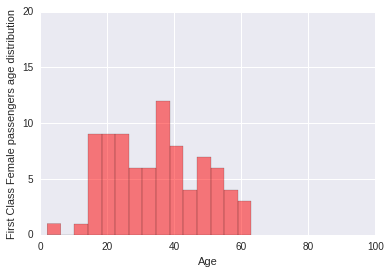

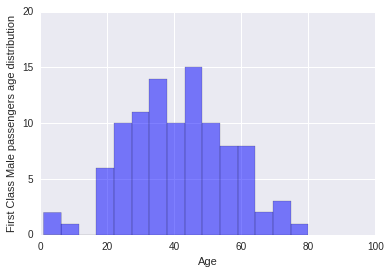

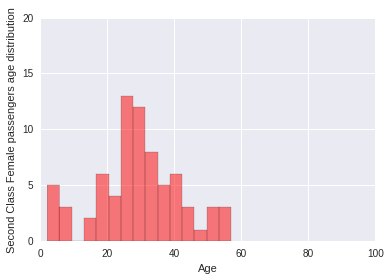

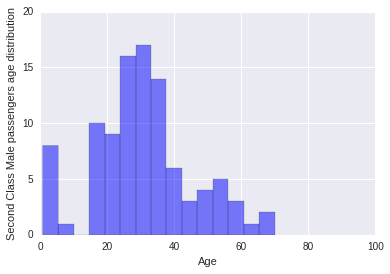

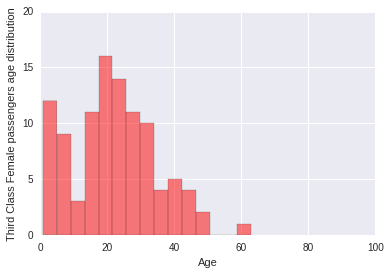

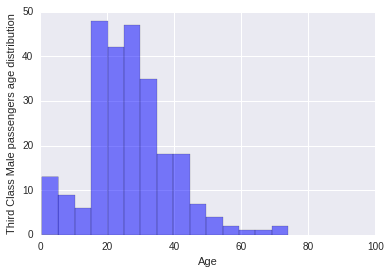

In [38]:



plt.figure(10)
n, bins, patches = plt.hist(data[lambda data: (data['Pclass']== 1) & (data['Sex'] == "female")]['Age'].dropna(), 
                            15, facecolor='red', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('First Class Female passengers age distribution')
plt.axis([0, 100, 0, 20])
plt.grid(True)

plt.figure(11)
n, bins, patches = plt.hist(data['Age'].dropna()[data['Pclass']== 1][data['Sex']== "male"], 
                            15, facecolor='blue', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('First Class Male passengers age distribution')
plt.axis([0, 100, 0, 20])
plt.grid(True)

plt.figure(12)
n, bins, patches = plt.hist(data['Age'].dropna()[data['Pclass']== 2][data['Sex']== "female"], 
                            15, facecolor='red', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Second Class Female passengers age distribution')
plt.axis([0, 100, 0, 20])
plt.grid(True)

plt.figure(13)
n, bins, patches = plt.hist(data['Age'].dropna()[data['Pclass']== 2][data['Sex']== "male"], 
                            15, facecolor='blue', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Second Class Male passengers age distribution')
plt.axis([0, 100, 0, 20])
plt.grid(True)

plt.figure(14)
n, bins, patches = plt.hist(data['Age'].dropna()[data['Pclass']== 3][data['Sex']== "female"], 
                            15, facecolor='red', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Third Class Female passengers age distribution')
plt.axis([0, 100, 0, 20])
plt.grid(True)

plt.figure(15)
n, bins, patches = plt.hist(data['Age'].dropna()[data['Pclass']== 3][data['Sex']== "male"], 
                            15, facecolor='blue', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Third Class Male passengers age distribution')
plt.axis([0, 100, 0, 50])
plt.grid(True)






In [7]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


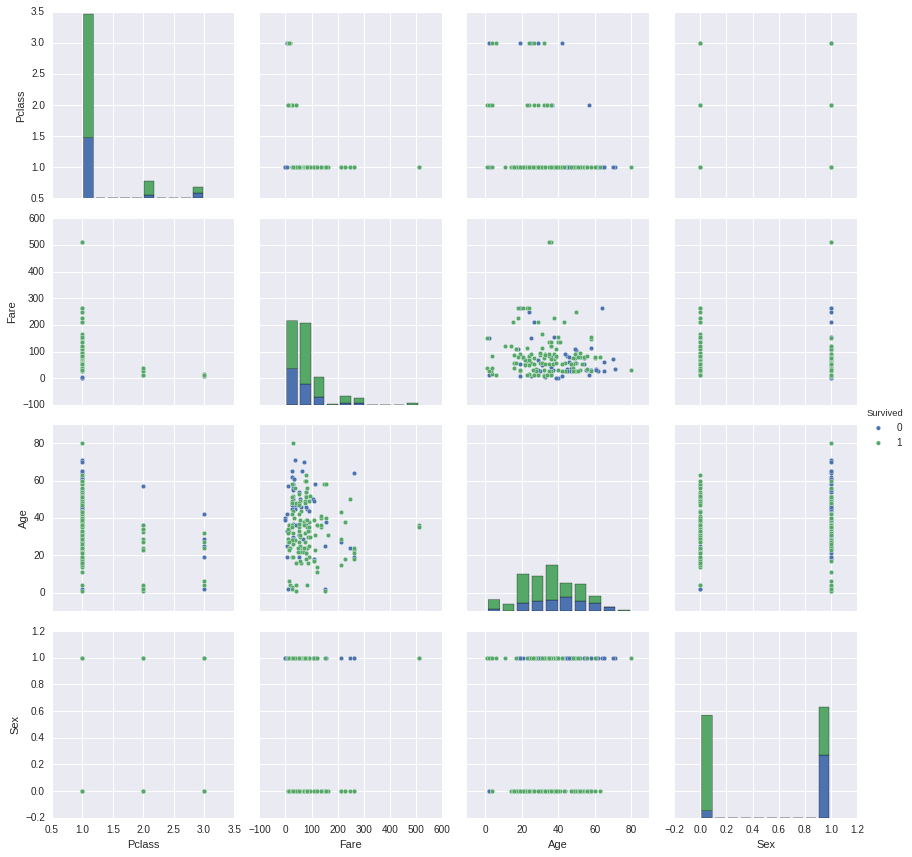

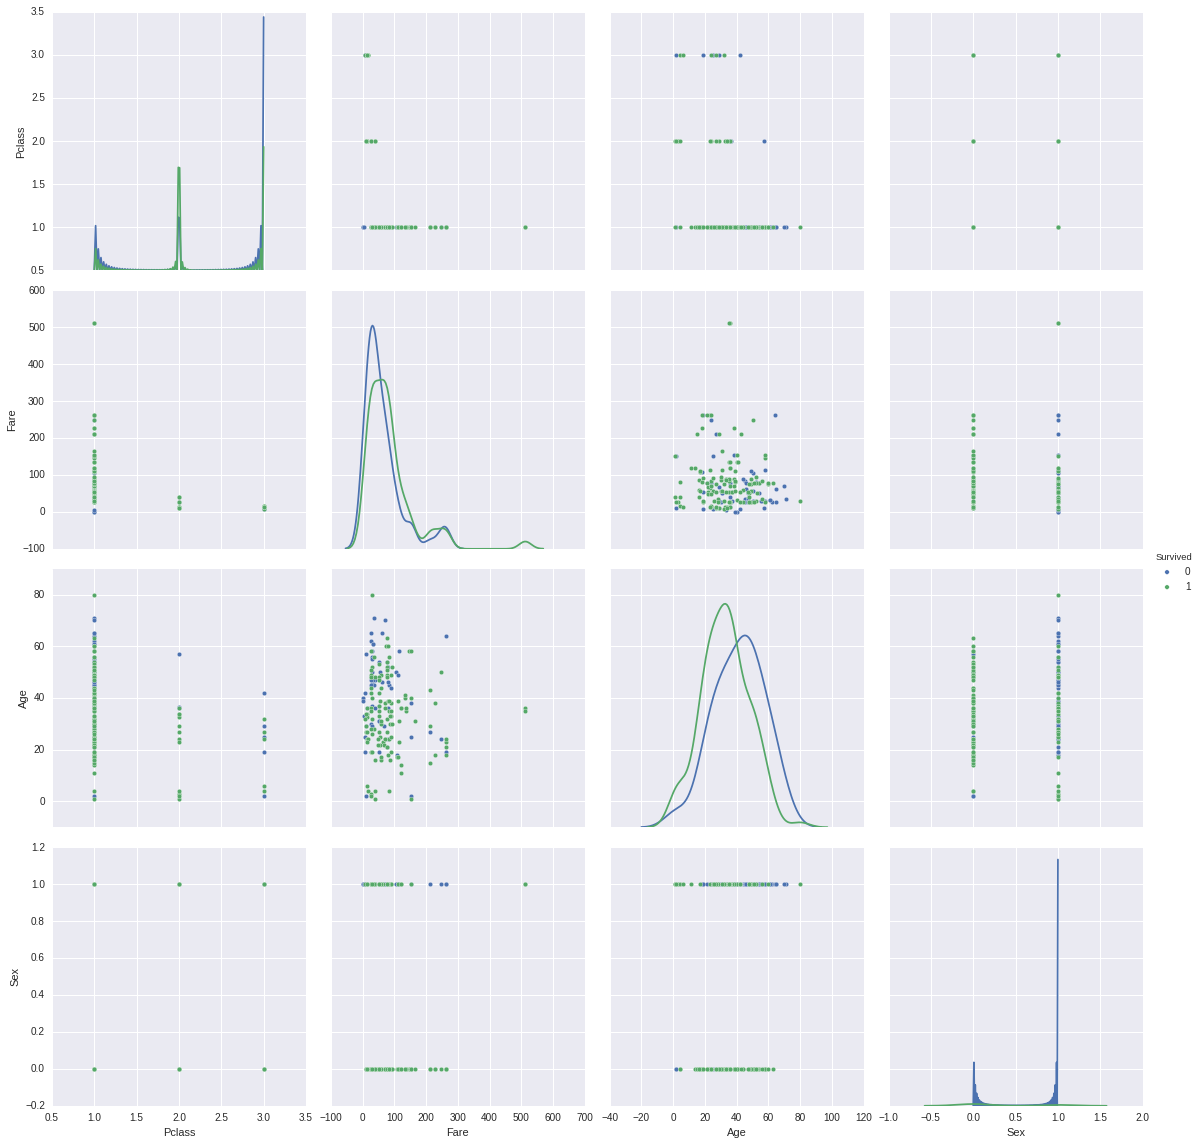

In [20]:
data['Sex'] = data['Sex'].astype('category').cat.codes
sns.pairplot(data.drop("PassengerId", axis=1).dropna(), hue="Survived", size=3, vars=["Pclass", "Fare", "Age", "Sex"])
sns.pairplot(data.drop("PassengerId", axis=1).dropna(), hue="Survived", size=4,
             vars=["Pclass", "Fare", "Age", "Sex"], diag_kind="kde")

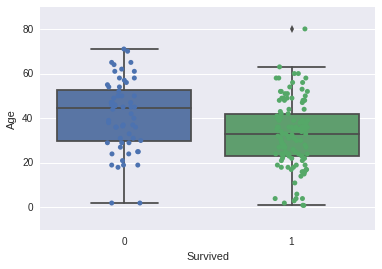

In [22]:
ax = sns.boxplot(x="Survived", y="Age", data=data.drop("PassengerId", axis=1).dropna())
ax = sns.stripplot(x="Survived", y="Age", data=data.drop("PassengerId", axis=1).dropna()
                   , jitter=True, edgecolor="gray")

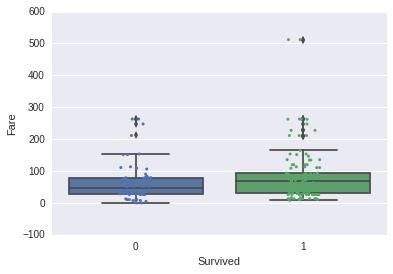

In [30]:
ax = sns.boxplot(x="Survived", y="Fare", data=data.drop("PassengerId", axis=1).dropna())
ax = sns.stripplot(x="Survived", y="Fare", data=data.drop("PassengerId", axis=1).dropna(),
                   jitter=True, edgecolor="gray", size=3)